<a href="https://colab.research.google.com/github/JeanCarloBejaran/Marketing-Campaign/blob/master/Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work-Plan
Answer these questions on the blog posts. Three: (1-3) (4-6) (7-8)

1. Frame the problem - Look at big picture

2. Get the Data

3. Explore, gain insights

4. Prepare data to better expose the underlying patterns to ML Algorithms.

5. Explore models and short-list the best ones.

6. Fine tune models and combine them into a great solution.

7. Present your solution.

8. Launch, monitor and mantain your system.



# Deliverables:

1. Explore Business to report insights on Business Operations and product-market fit.
2. Report communicating model's findings relevant to the business's health. 
3. Model that predicts new customer's behaviors and purchases. 
4. Recommendations on next quarter's strategy. (Order data based on Dt_Customer to simulate new data.)


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [0]:
#Get the data

raw_data = pd.read_csv('/marketing_campaign.csv', sep = ';')

drop_columns = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Z_CostContact','Z_Revenue', 'Response']
Customers = raw_data.drop(drop_columns, axis = 1)
Customers.sort_values('Dt_Customer')
Customers.set_index('Dt_Customer', inplace = True)

Full_Dataset_len = len(Customers)


## ${\textbf{Split out the test set}}$

In [0]:
#To simulate new customers, I removed the last 10 percent of customers to sign up.
Customers_indeces = int(len(Customers)*0.9)
New_Customers = Customers.iloc[Customers_indeces:]
Customers = Customers.iloc[:Customers_indeces]

#Test that we succesfully split the data
assert len(New_Customers) + len(Customers) == Full_Dataset_len

# ${\textbf{Part 1: Exploratory Data Analysis}}$

## ${\textbf{Market Analysis}}$

1. Who are our Customers?
2. How are they distributed based on their signup features?

Signup_features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer']

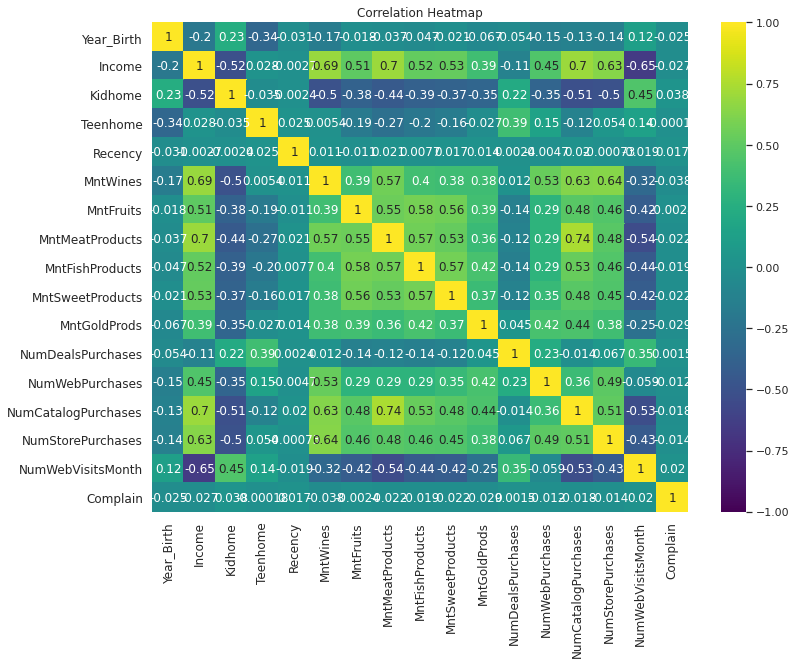

In [36]:
#Quick data overview through a feature correlation heatmap
plt.figure(figsize = (12,9))
s = sns.heatmap(Customers.reset_index().corr(),
               annot = True, 
               cmap = 'viridis',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 2012-09-04 to 2013-03-29
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3   Income               1999 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Recency              2016 non-null   int64  
 7   MntWines             2016 non-null   int64  
 8   MntFruits            2016 non-null   int64  
 9   MntMeatProducts      2016 non-null   int64  
 10  MntFishProducts      2016 non-null   int64  
 11  MntSweetProducts     2016 non-null   int64  
 12  MntGoldProds         2016 non-null   int64  
 13  NumDealsPurchases    2016 non-null   int64  
 14  NumWebPurchases      2016 non-null   int64  
 15  NumCatalogPurchases  2016 no

In [38]:
#How many null values do we have?
Customers.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
dtype: int64

In [49]:
#Describe these rows
Null_Income = Customers[Customers.Income.isna()]
Null_Income.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,17.000000,0.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,1968.705882,NaN,0.764706,0.588235,51.235294,192.647059,20.058824,99.176471,21.764706,30.647059,44.176471,2.352941,4.294118,1.529412,4.941176,5.352941,0.0
std,11.328971,NaN,0.664211,0.618347,31.355879,265.627310,35.527227,135.011220,28.322980,63.407355,87.634351,2.849148,6.222587,1.841115,3.268612,2.396382,0.0
min,1951.000000,NaN,0.000000,0.000000,4.000000,5.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
25%,1959.000000,NaN,0.000000,0.000000,23.000000,11.000000,1.000000,12.000000,2.000000,2.000000,6.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.0
50%,1970.000000,NaN,1.000000,1.000000,49.000000,48.000000,5.000000,43.000000,6.000000,4.000000,15.000000,1.000000,2.000000,1.000000,4.000000,6.000000,0.0
75%,1973.000000,NaN,1.000000,1.000000,80.000000,231.000000,20.000000,172.000000,38.000000,30.000000,39.000000,3.000000,6.000000,3.000000,7.000000,7.000000,0.0
max,1989.000000,NaN,2.000000,2.000000,96.000000,861.000000,138.000000,461.000000,98.000000,263.000000,362.000000,12.000000,27.000000,5.000000,12.000000,9.000000,0.0


In [47]:
#Comparing null values with the whole dataset
Customers.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2016.000000,1999.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1968.850198,52109.370185,0.443452,0.500992,49.213790,305.908234,26.371528,168.003968,37.687996,27.555060,43.665179,2.320437,4.079861,2.687996,5.815972,5.310516,0.009921
std,11.992900,21489.215163,0.539991,0.545679,28.960372,338.171717,39.889915,225.793019,54.745578,41.878567,51.617293,1.954444,2.775660,2.955144,3.255438,2.450666,0.099132
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51412.000000,0.000000,0.000000,50.000000,176.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68656.000000,1.000000,1.000000,74.000000,499.750000,33.000000,235.500000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


The null income customers don't appear to have any statistically significant differences from the rest of the data at a first glance. 

In [0]:
#Create a total amount spent per Customer.


Text(0.5, 1.0, 'Customer Education Distribution')

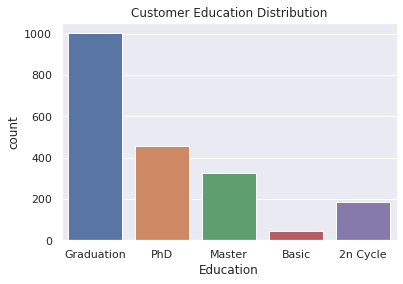

In [40]:
sns.countplot(x = 'Education', data = Customers)
plt.title('Customer Education Distribution')



Text(0.5, 1.0, 'Customer Marital Distribution ')

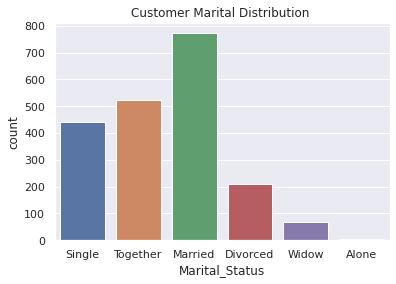

In [41]:
sns.countplot(x = 'Marital_Status',data = Customers)
plt.title('Customer Marital Distribution ')

#Insights:




## ${\textbf{Business Analysis}}$

1. Revenue: Total and per sector over the last two years
2. Predict Complaining - Is recency related to complaining: how important is complaining / What percentage of Customers who complain recind?
3. What is the mediums our Customers engage with us the most?

#Part 2: Machine Learning Notebook
Prepare the Data:



In [0]:
#possible strategies for pipeline:
#Drop missing income values, make missing values a category, use median, use regression function to estimate.
SimpleImputer(strategy = 'constant', fill_value='missing')


#Preprocessing
Customers['Income_missing'] = [1 for income in Customers.Income if Customers.Income == 'missing' else 0]
Customers[Customers.Marital_Status == 'Alone'] = 'Single'
Customers['Education'] = Customers.Education.astype('category')
Customers['Marital_Status'] = Customers.Marital_Status.astype('category')

ohe = OneHotEncoder()
col_transformer = make_column_transformer((ohe, make_column_selector(dtype_include = 'category')))

col_transformer.fit_transform(Customers)

In [0]:
#Explore possible model performance increase by filling income values using a linear regression
#Replace missing vlaues with linear regression using the other features. (Bloggable)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [0]:
#Find a way to rank features to answer the best questions:

#Possible value generatable with this data:
  #Cluster clients to decide our development strategy for the future based on new registrations. (K-Means)
    #Use incoming registration data to deploy model that: (In a business scenario, I would prioritize focus by asking internal client)
      # Predict amount spent on group of goods over next 2 years. (2-year-value)
      # Predict platform interaction behavior (NumWebVisits)
      # Predict if the new customers will complain? Why? How much are we losing because they will?

In [0]:
# (Possible) Deploy the new customers test data to a csv on github (using it as a database) to access and assess our predictions to practice webscraping Using requests (r = requests.get(url); df = pd.read_html(r.text); return df[0] )

# Part 3: Part App Building and Deployment Notebook
  -Deploy model to Heroku in a flask app that takes in a csv of new customers and returns a dashboard with the predictions for the next 2-year value. 